In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style('whitegrid')

OVERHEAD = 0.01
RESULT_DIR = '../../results-new-sliced/'
# RESULTS_PATH = RESULT_DIR + '/exp-gap_600-real_mean_over=0.1.csv'
# RESULTS_PATH = RESULT_DIR + '/exp-gap_60-real_mean_over=0.1.csv'
RESULTS_PATH = RESULT_DIR + f'/real_overhead={OVERHEAD}.csv'
# RESULTS_PATH = f'../results/exp_real_mean_overhead={OVERHEAD}.csv'

df = pd.read_csv(RESULTS_PATH, sep='\t')
df = df[~df['use_avg']]

origin_loose_record = df[(df['algorithm'] == 'loose_time_sliced')
                         & df['max slice slacks'].isna()
                         & df['max total slacks'].isna()]

group_time_sliced = df[(df['algorithm'] == 'group_time_sliced')]
group_time_sliced['group_i'] = np.nan
group_time_sliced['group_j'] = np.nan

group_time_sliced

for group_i in [1, 2, 4, 8]:
    for group_j in [1, 2, 4, 8]:
        group_time_sliced.loc[(group_time_sliced['slice interval'] ==
                           f'({group_i}, {group_j})'), 'group_i'] = group_i
        group_time_sliced.loc[(group_time_sliced['slice interval'] ==
                           f'({group_i}, {group_j})'), 'group_j'] = group_j

/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_69656/1856748917.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_time_sliced['group_i'] = np.nan
/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_69656/1856748917.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_time_sliced['group_j'] = np.nan
/Users/zhwu/miniconda3/envs/sky-dev/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [35]:
group_time_sliced[group_time_sliced['slice interval'] == '(1, 1)']

,algorithm,slice interval,use_avg,max slice slacks,max total slacks,demand ratio,mean,p90,p95,std,group_i,group_j
14,group_time_sliced,"(1, 1)",False,NaN,NaN,0.326496,0.541235,0.740528,0.762757,0.12834,1.0,1.0
83,group_time_sliced,"(1, 1)",False,NaN,NaN,0.326496,0.541235,0.740528,0.762757,0.12834,1.0,1.0
152,group_time_sliced,"(1, 1)",False,NaN,NaN,0.326496,0.541235,0.740528,0.762757,0.12834,1.0,1.0
221,group_time_sliced,"(1, 1)",False,NaN,NaN,0.326496,0.541235,0.740528,0.762757,0.12834,1.0,1.0
290,group_time_sliced,"(1, 1)",False,NaN,NaN,0.326496,0.541235,0.740528,0.762757,0.12834,1.0,1.0


Text(0.5, 1.0, 'Cost vs slice interval (overhead=0.01)')

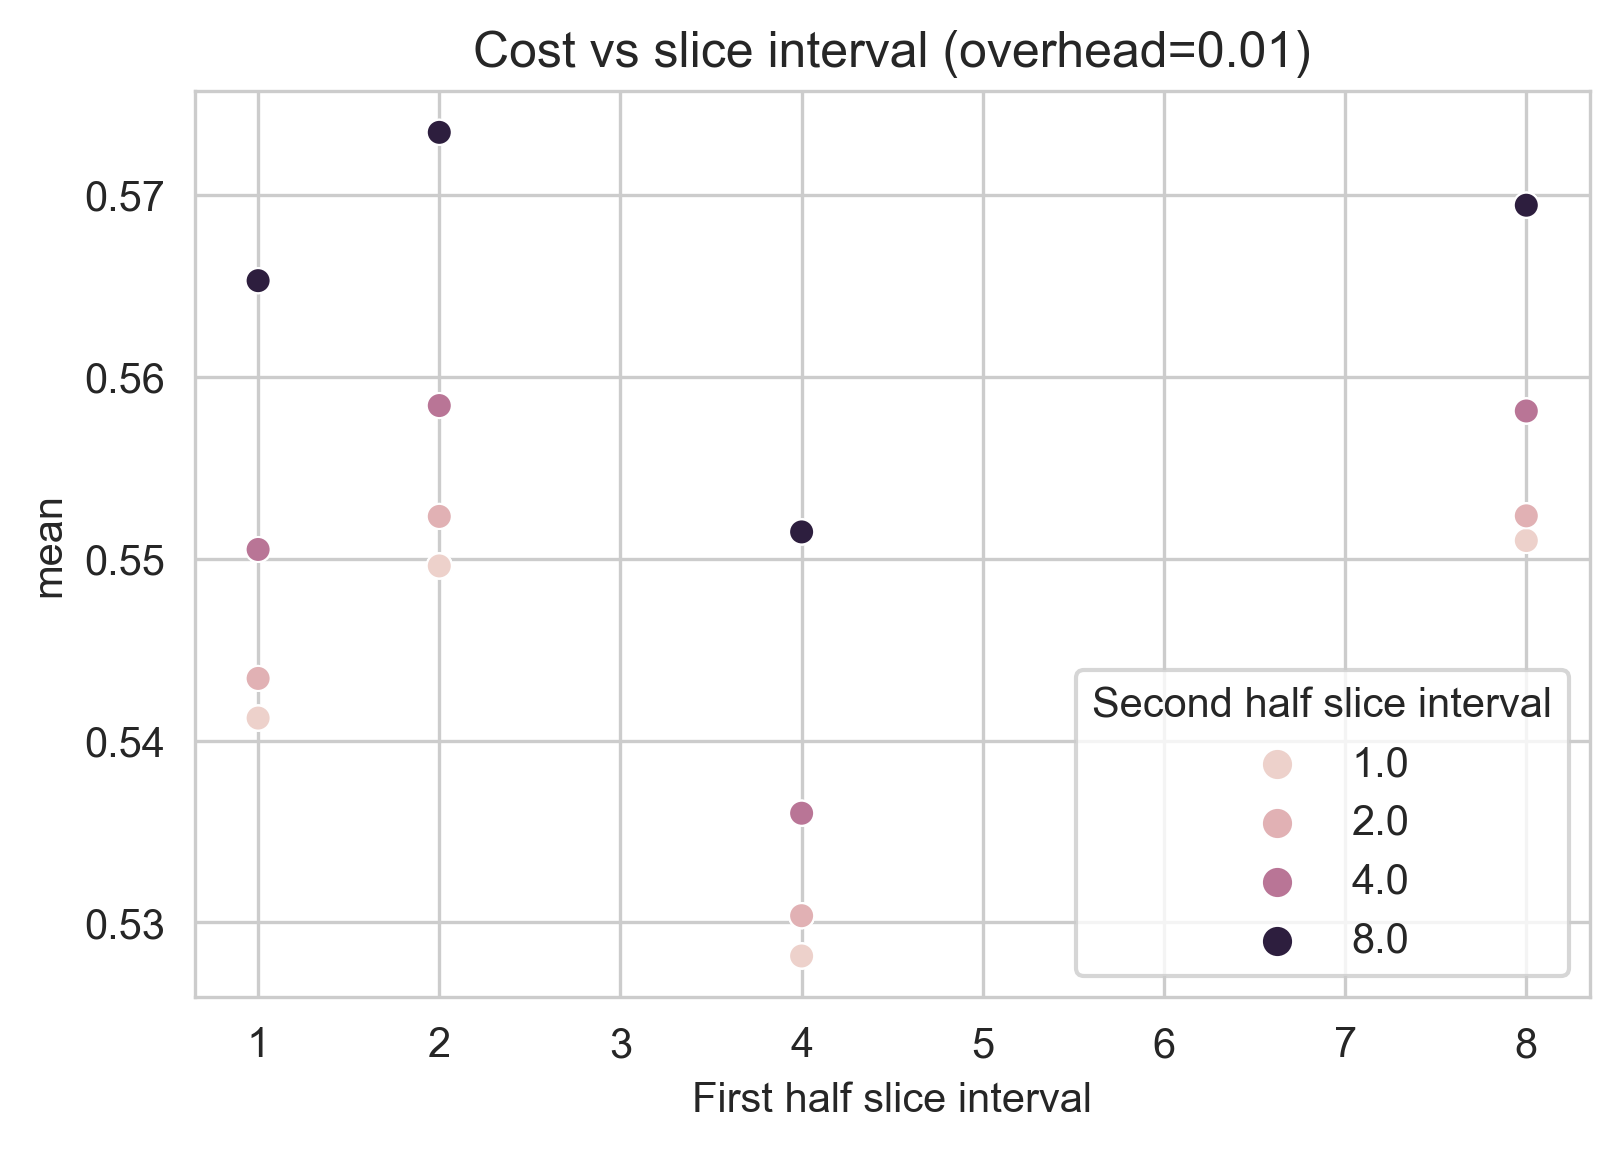

In [36]:
# group_time_sliced
fig = plt.figure(dpi=300, figsize=(6, 4))
ax = fig.add_subplot(111)
sns.scatterplot(x='group_i', y='mean', hue='group_j', data=group_time_sliced, ax=ax)
ax.set_xlabel('First half slice interval')
ax.legend(title='Second half slice interval')

ax.set_title(f'Cost vs slice interval (overhead={OVERHEAD})')
